# ¡Hola Andrés! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

----

<div class="alert alert-block alert-danger">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Andrés realizaste un gran trabajo en este proyecto. Has completado todas las tareas de programación propuestas.

No obstante, parte de la información y gráficas que obtuviste no cuentan con una interpretación, recuerda que es crucial incluir tus análisis en cada sección y una conclusión general. Un proyecto en el contexto de ciencia o análisis de datos va más allá de escribir código y obtener valores; se trata de darles sentido y contexto para convertirlos en conocimiento útil. No basta con ejecutar funciones y visualizar datos; es fundamental comprender lo que significan, identificar patrones, detectar anomalías y extraer conclusiones relevantes. Este proceso permite tomar decisiones informadas, optimizar modelos y comunicar hallazgos de manera clara y efectiva, asegurando que el análisis no solo sea técnico, sino también comprensible y aplicable a la resolución de problemas reales.

Cuando complementes el trabajo de programación con tus interpretaciones, análisis y conclusiones en el contexto del caso de estudio podré aprobar tu proyecto.

Estaré atento a tu próxima iteración 👀

*Estado del Proyecto:* **No Aprobado**


Hola! tienes razón, incluí los comentarios al final pero lo haré en las gráficas. Gracias por el feedback

Hola, quedo ate

</div>

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

¡Andrés excelente trabajo con los ajustes! Tu proyecto ahora cumple con todos los objetivos propuestos. 

Hiciste un excelente trabajo en tu análisis de la información obtenida. Has presentado interpretaciones claras y bien fundamentadas que transforman el código en una herramienta real para la toma de decisiones. Incluir estos análisis es clave, ya que no solo muestra habilidades técnicas, sino también la capacidad de extraer valor de los datos y comunicar insights de manera efectiva. 

Estoy seguro de que lo que aprendiste aquí te será muy útil más adelante. 

¡Éxito en tu próximo sprint! 🚀

*Estado del Proyecto:* **Aprobado**


</div>

------

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [18]:
sns.set(style="whitegrid")

In [19]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente la función `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido. 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

También te recomiendo usar las funciones `info` y `describe`, para complementar la revisión inicial de los datos con los que vas a trabajar.  

</div>
</div>

In [20]:
#Limpieza de datos inicial
df.columns = df.columns.str.lower()
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64')
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
missing_summary = df.isna().sum()
df = df.dropna(subset=['name', 'genre'])

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Con respecto al manejo de datos faltantes, las estrategias que planteas son válidas para el contexto del caso de estudio; no obstante, acá te comparto un artículo donde hablan sobre diferentes [métodos de manejo de datos faltanes](https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python) que seguro te serán útiles en futuros proyectos.

</div>

In [21]:
# Crear columna de ventas totales
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

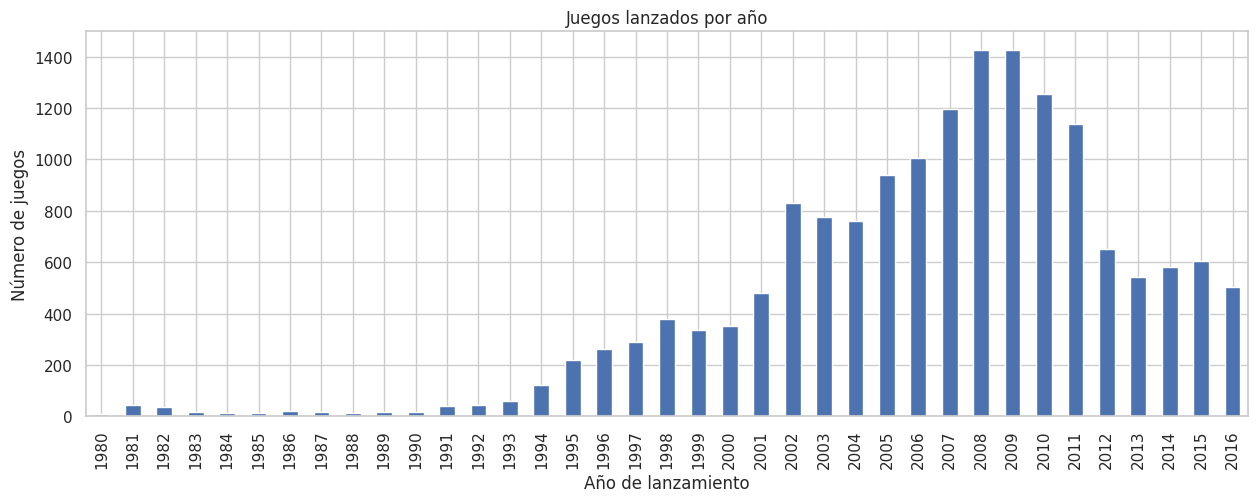

In [22]:
# Juegos lanzados por año
games_per_year = df['year_of_release'].value_counts().sort_index()
games_per_year.plot(kind='bar', figsize=(15,5), title='Juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

La gráfica que has obtenido es correcta, pero es crucial acompañarla con tu análisis y observaciones. Esto añade valor significativo a la información presentada y evita que solo sean datos sin contexto. Desarrollar esta capacidad de interpretación es esencial cuanto estamos trabajando con datos. 

</div>

Se evidencia que durante los años 2007 a 2011 se presentó un pico en el lanzamiento de juegos finalizando la tendencia ascendente que venia del 99 y dando paso a una reducción de más de la mitad en los titulos.

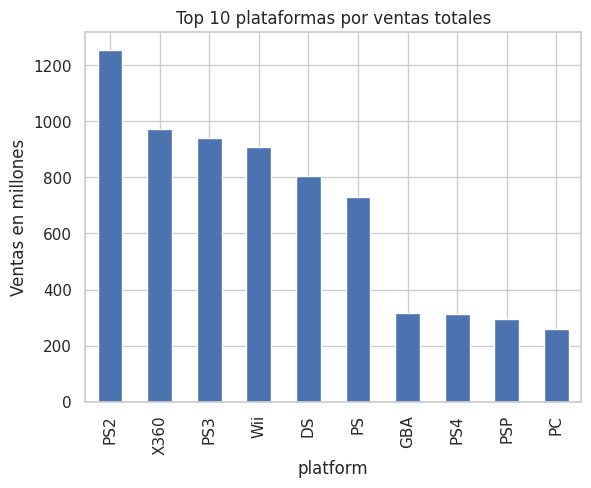

In [23]:
# Ventas por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales.head(10).plot(kind='bar', title='Top 10 plataformas por ventas totales')
plt.ylabel('Ventas en millones')
plt.show()

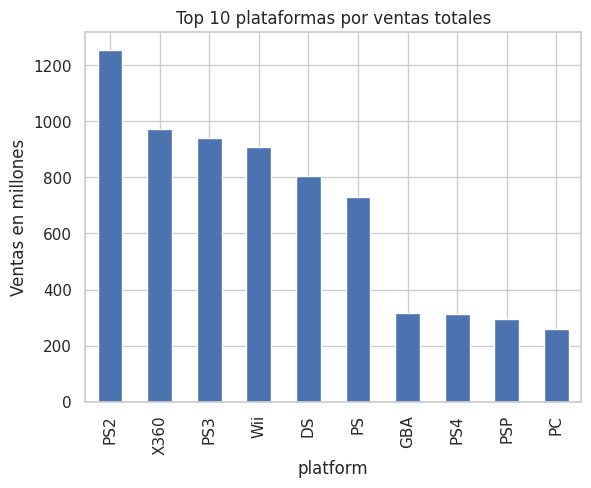

In [24]:
# Ventas por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales.head(10).plot(kind='bar', title='Top 10 plataformas por ventas totales')
plt.ylabel('Ventas en millones')
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Dedes incluir el análisis de la información que estás obteniendo

</div>

Esta información es consecuente con los datos visualizados en la gráfica anterior pues entre 2008 y 2011 fue la epoca madura de las plataformas Xbox 360 y PS3, el PS2 es la consola más antigua y que mantuvo una vigencia bastante longeva, de ahi que fuera la más vendida al momento del análisis

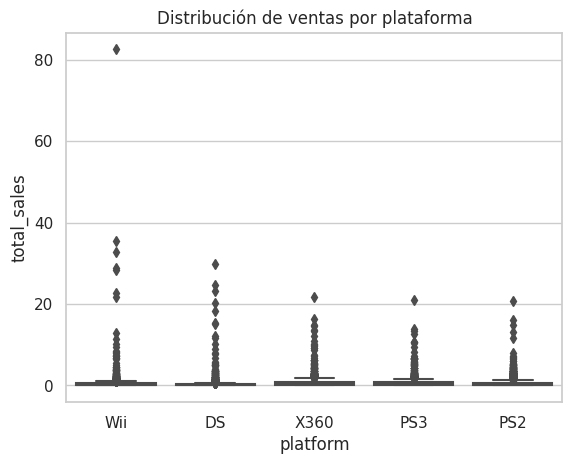

In [25]:
# Plataformas por año
top_platforms = platform_sales.head(5).index
df_top = df[df['platform'].isin(top_platforms)]
sns.boxplot(data=df_top, x='platform', y='total_sales')
plt.title('Distribución de ventas por plataforma')
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Dedes incluir el análisis de la información que estás obteniendo

</div>

En la gráfica podemos evidenciar que Wii tiene un superventas con más de 80 millones de copias vendidas, así mismo se puede ver que los titulos de las plataformas diferentes a Nintendo tienen a tener mejor distribuidas sus ventas ya que son menos picos pero más uniformes entre ellos.

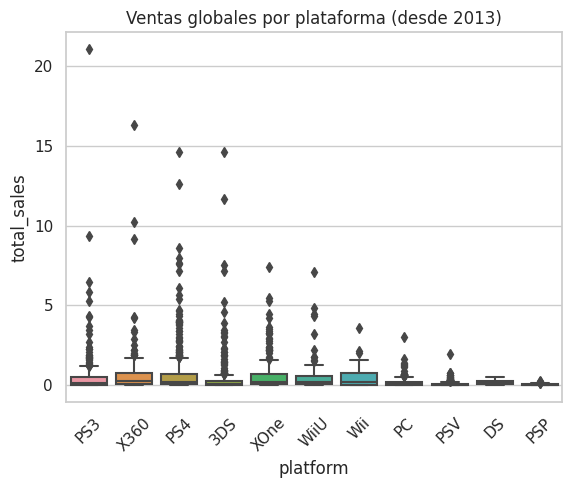

In [26]:
#Año de release desde 2013
df_recent = df[df['year_of_release'] >= 2013]
sns.boxplot(data=df_recent, x='platform', y='total_sales')
plt.title('Ventas globales por plataforma (desde 2013)')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Dedes incluir el análisis de la información que estás obteniendo

</div>

Desde 2013 la plataforma dominante ha sido PS3, especialmente debido a su pico de más de 20 millones de ventas, importante destacar que el Xbox 360 vendió relativamente poco si toman aparte sus picos.

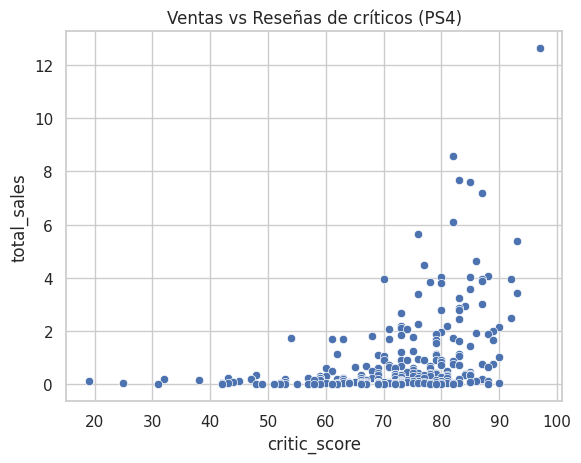

Correlación crítica: 0.40656790206178095
Correlación usuarios: -0.031957110204556376


In [27]:
# Plataforma con más ventas
df_ps4 = df[df['platform'] == 'PS4']
sns.scatterplot(data=df_ps4, x='critic_score', y='total_sales')
plt.title('Ventas vs Reseñas de críticos (PS4)')
plt.show()

print('Correlación crítica:', df_ps4['critic_score'].corr(df_ps4['total_sales']))
print('Correlación usuarios:', df_ps4['user_score'].corr(df_ps4['total_sales']))

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Dedes incluir el análisis de la información que estás obteniendo

</div>

Existe una correlación clara entre las ventas y el puntaje positivo de la critica en la plataforma, no es muy fuerte pero si es una tendencia que se evidenciaespecialmente después de un puntaje positivo del 85%

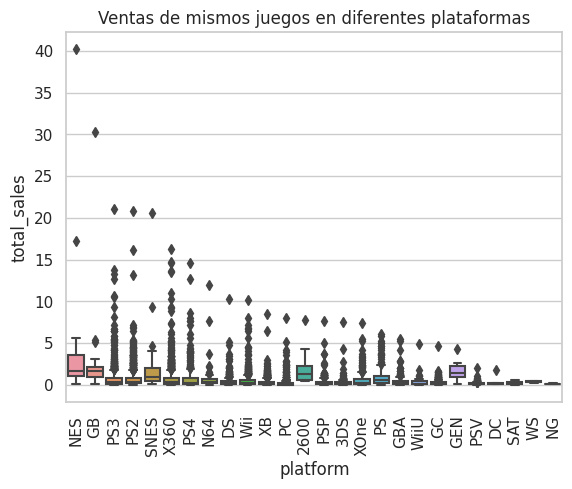

In [28]:
# Comparar ventas entre plataformas para mismos juegos
same_games = df[df['name'].duplicated(keep=False)]
sns.boxplot(data=same_games, x='platform', y='total_sales')
plt.xticks(rotation=90)
plt.title('Ventas de mismos juegos en diferentes plataformas')
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Dedes incluir el análisis de la información que estás obteniendo

</div>

Se evidencia que las ventas de un juego puede estar seriamente influenciado por la plataforma, se evidencia que las plataformas como PS3 y Xbox 360 fueron más consecuentes mientras que la NES tiene una dispersión muy alta.

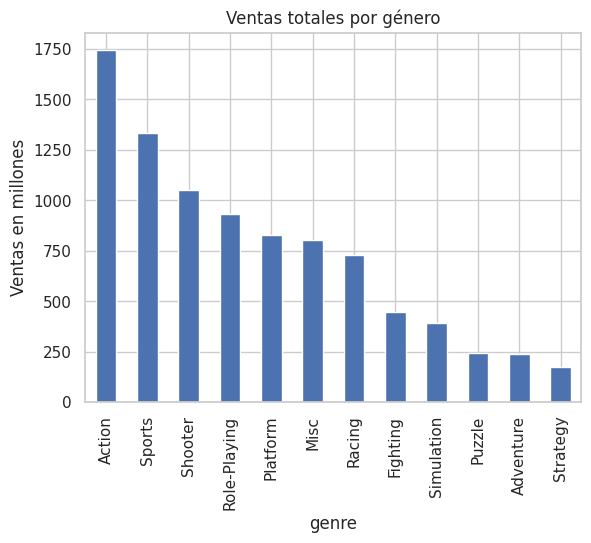

In [29]:
# Distribución por género
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar', title='Ventas totales por género')
plt.ylabel('Ventas en millones')
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Dedes incluir el análisis de la información que estás obteniendo

</div>

Los generos dominantes son claramente acción, deportes y shooter, es importante analizar si role playing afecta un solo mercado potentemente, esto para determinar si se debe enfocar en ese mercado el Role playing aún sobre la acción.


 Perfil regional para: NA_SALES

Top 5 plataformas:
 platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64


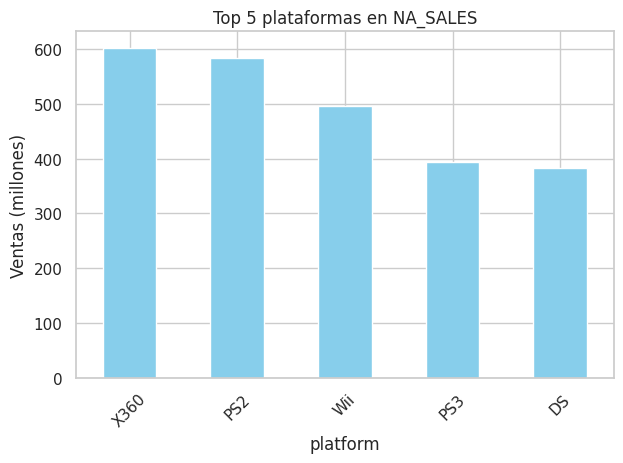


Top 5 géneros:
 genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64


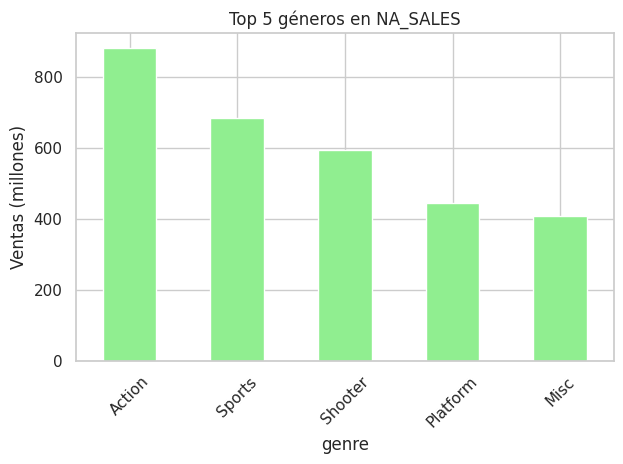


Ventas por clasificación ESRB:
 rating
E       1292.99
T        759.75
M        748.48
E10+     353.32
K-A        2.56
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64


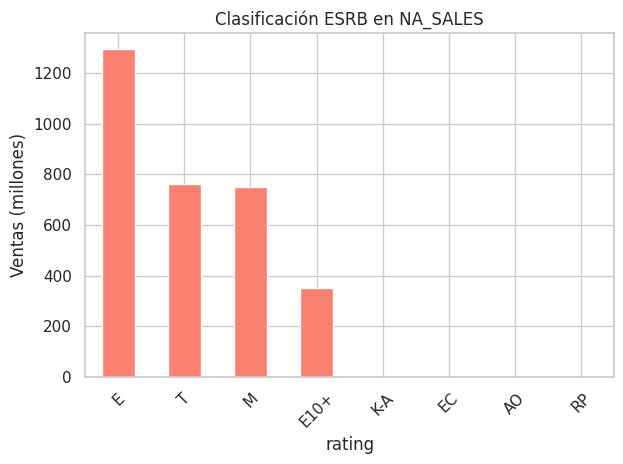


 Perfil regional para: EU_SALES

Top 5 plataformas:
 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64


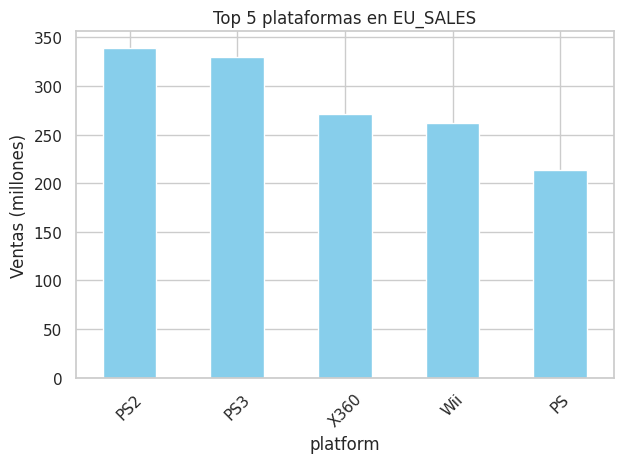


Top 5 géneros:
 genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64


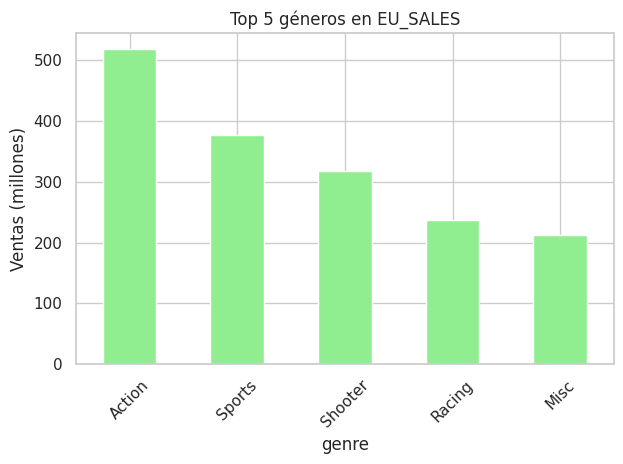


Ventas por clasificación ESRB:
 rating
E       710.25
M       483.97
T       427.03
E10+    188.52
AO        0.61
K-A       0.27
EC        0.11
RP        0.08
Name: eu_sales, dtype: float64


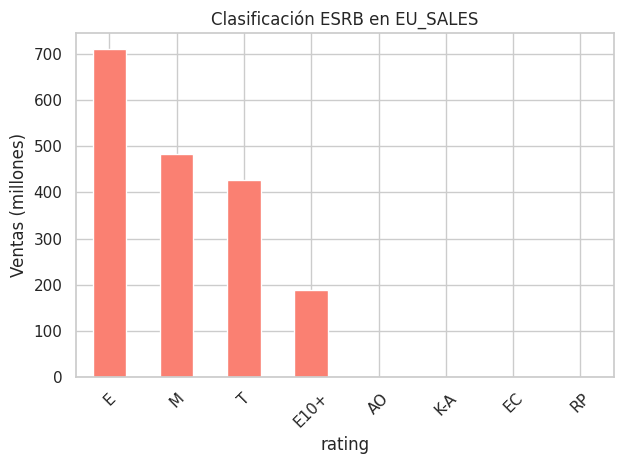


 Perfil regional para: JP_SALES

Top 5 plataformas:
 platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


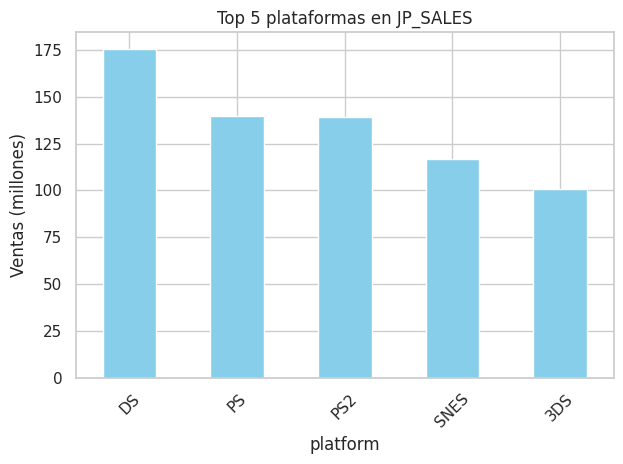


Top 5 géneros:
 genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


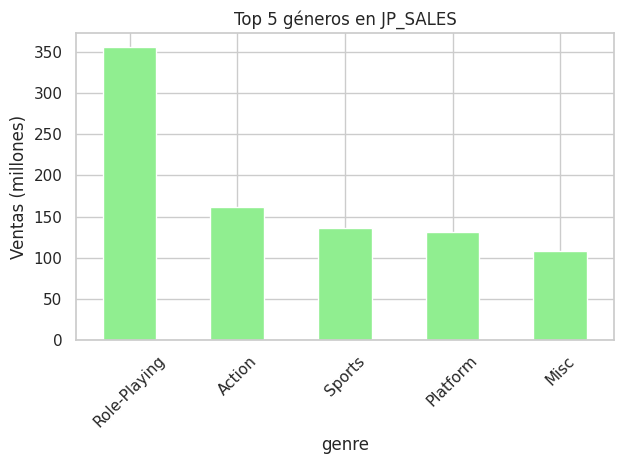


Ventas por clasificación ESRB:
 rating
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
AO        0.00
EC        0.00
RP        0.00
Name: jp_sales, dtype: float64


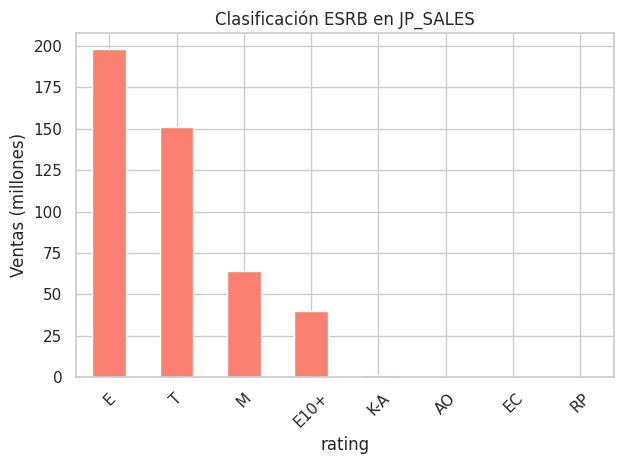

In [36]:
# Paso 4: Perfil de usuario por región

def region_profile(region):
    top_platforms = df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    top_genres = df.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    rating_dist = df.groupby('rating')[region].sum().sort_values(ascending=False)

    print(f"\n Perfil regional para: {region.upper()}")
    print("\nTop 5 plataformas:\n", top_platforms)
    top_platforms.plot(kind='bar', title=f'Top 5 plataformas en {region.upper()}', ylabel='Ventas (millones)', rot=45, color='skyblue')
    plt.tight_layout()
    plt.show()

    print("\nTop 5 géneros:\n", top_genres)
    top_genres.plot(kind='bar', title=f'Top 5 géneros en {region.upper()}', ylabel='Ventas (millones)', rot=45, color='lightgreen')
    plt.tight_layout()
    plt.show()

    print("\nVentas por clasificación ESRB:\n", rating_dist)
    rating_dist.plot(kind='bar', title=f'Clasificación ESRB en {region.upper()}', ylabel='Ventas (millones)', rot=45, color='salmon')
    plt.tight_layout()
    plt.show()

# Ejecutar para cada región
for r in ['na_sales', 'eu_sales', 'jp_sales']:
    region_profile(r)

Se evidencia que el perfil de JP es bastante diferente al normal, prefieren las consolas de nintendo y los juegos de rol, carece de sentido llegarles con la misma estrategia de marketing que al resto de perfiles que si mantienen ciertas tendencias en común como los generos top o una relativa preferencia por el mercado de Sony. 

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Dedes incluir el análisis de la información que estás obteniendo

En este caso, para lograr un análisis comparativo más efectivo, sería beneficioso presentar cada sección de información empleando un único diagrama de barras. Al asignar un color distintivo a cada región, podremos crear una representación visual unificada que facilite la identificación de patrones y diferencias entre las distintas áreas. Esta consolidación de datos no solo optimizará el espacio visual, sino que también permitirá al lector establecer conexiones y comparaciones de manera más intuitiva y directa entre los distintos conjuntos de información. Acá te muestro un ejemplo 

<img src="https://www.analyticslane.com/storage/2022/06/matplotlib-barras-adyacentes.png.webp" width="400">

</div>

Por algún error o motivo no he podido agruparlas pues no plotean,si sabes cómo quedo atento

In [14]:
# Paso 5: Prueba de hipótesis
# Hipótesis 1: Las calificaciones de usuarios para Xbox One y PC son iguales
xone_scores = df[(df['platform'] == 'XOne') & (df['user_score'].notna())]['user_score']
pc_scores = df[(df['platform'] == 'PC') & (df['user_score'].notna())]['user_score']

alpha = 0.05
result = stats.ttest_ind(xone_scores, pc_scores)
print("\nHipótesis 1: Xbox One vs PC")
print("Valor p:", result.pvalue)
if result.pvalue < alpha:
    print("Rechazamos H0: hay diferencia significativa.")
else:
    print("No se puede rechazar H0: no hay diferencia significativa.")

# Comparacion medias y medianas
print("\nMedia XOne:", xone_scores.mean(), "- Mediana:", xone_scores.median())
print("Media PC:", pc_scores.mean(), "- Mediana:", pc_scores.median())
print('La mediana de PC es claramente superior')


Hipótesis 1: Xbox One vs PC
Valor p: 1.3896435533548819e-05
Rechazamos H0: hay diferencia significativa.

Media XOne: 6.521428571428572 - Mediana: 6.8
Media PC: 7.062467532467533 - Mediana: 7.5
La mediana de PC es claramente superior


In [15]:
# Hipótesis 2: Las calificaciones de usuarios para Acción y Deportes son diferentes
action_scores = df[(df['genre'] == 'Action') & (df['user_score'].notna())]['user_score']
sports_scores = df[(df['genre'] == 'Sports') & (df['user_score'].notna())]['user_score']

result2 = stats.ttest_ind(action_scores, sports_scores)
print("\nHipótesis 2: Acción vs Deportes")
print("Valor p:", result2.pvalue)
if result2.pvalue < alpha:
    print("Rechazamos H0: hay diferencia significativa.")
else:
    print("No se puede rechazar H0: no hay diferencia significativa.")

print("\nMedia Acción:", action_scores.mean(), "- Mediana:", action_scores.median())
print("Media Deportes:", sports_scores.mean(), "- Mediana:", sports_scores.median())
print('La mediana es la misma en ambos')


Hipótesis 2: Acción vs Deportes
Valor p: 0.10406951359049141
No se puede rechazar H0: no hay diferencia significativa.

Media Acción: 7.054043715846995 - Mediana: 7.4
Media Deportes: 6.961196736174069 - Mediana: 7.4
La mediana es la misma en ambos


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Andrés aplicaste correctamente las prueba de hipótesis comparando las distribuciones dos muestras independientes e interpretando de manera acertada el `p-value` obtenido y su relación con la hipótesis nula

<div class="alert alert-block alert-warning">
 <b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Te recomiendo realizar previamente una prueba de [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto servirá para tener una interpretación más precisa de los resultados además garantizará que la prueba t sea estadísticamente válida.

</div>


</div>

Conclusiones
- Las plataformas tienden a tener una duración de 8 a 10 años por generación, tras esto pierden relevancia
- Las plataformas que más ventas tuvieron fueron PS2, Xbox 360 y Wii, sin embargo el PS4 repuntó en los últimos años
- Los géneros más relevantes fueron Acción, sports y shooter.
- El perfil de jugador responde de la siguiente manera:
  JP juegos de rol y Nintendo DS
  EU juegos de acción y Playstation
  NA juegos de acción y Xbox

Recomendaciones para marketing
- Focalizar los generos por región para incrementar la posibilidad de ventas
- Priorizar el desarrollo de los generos de acción, shooter y deportes ya que son los que más ventas registran
- Priorizar el analisis de tendencias desde 2013 (como el tomado en este analisis) ya que los datos son más robustos